<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_classify_tien_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [27]:

folder = '/content/drive/MyDrive/Data_CNN/Train/tien'
tien = ['1nghin', '2nghin', '5nghin', '10nghin','20nghin', '50nghin', '100nghin', '200nghin','500nghin']
photos, lables = list(), list()
for i in range (9):
  filename = folder +'/'+ tien[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos_train = asarray(photos)
lables_train = asarray(lables)

In [28]:
print(photos_train.shape)
print(lables_train.shape)

(1172, 40, 40, 3)
(1172,)


In [29]:
from keras.utils import to_categorical
y_train = to_categorical(lables_train)
print(y_train.shape)

(1172, 9)


In [30]:
X_train = photos_train.astype('float32')/255

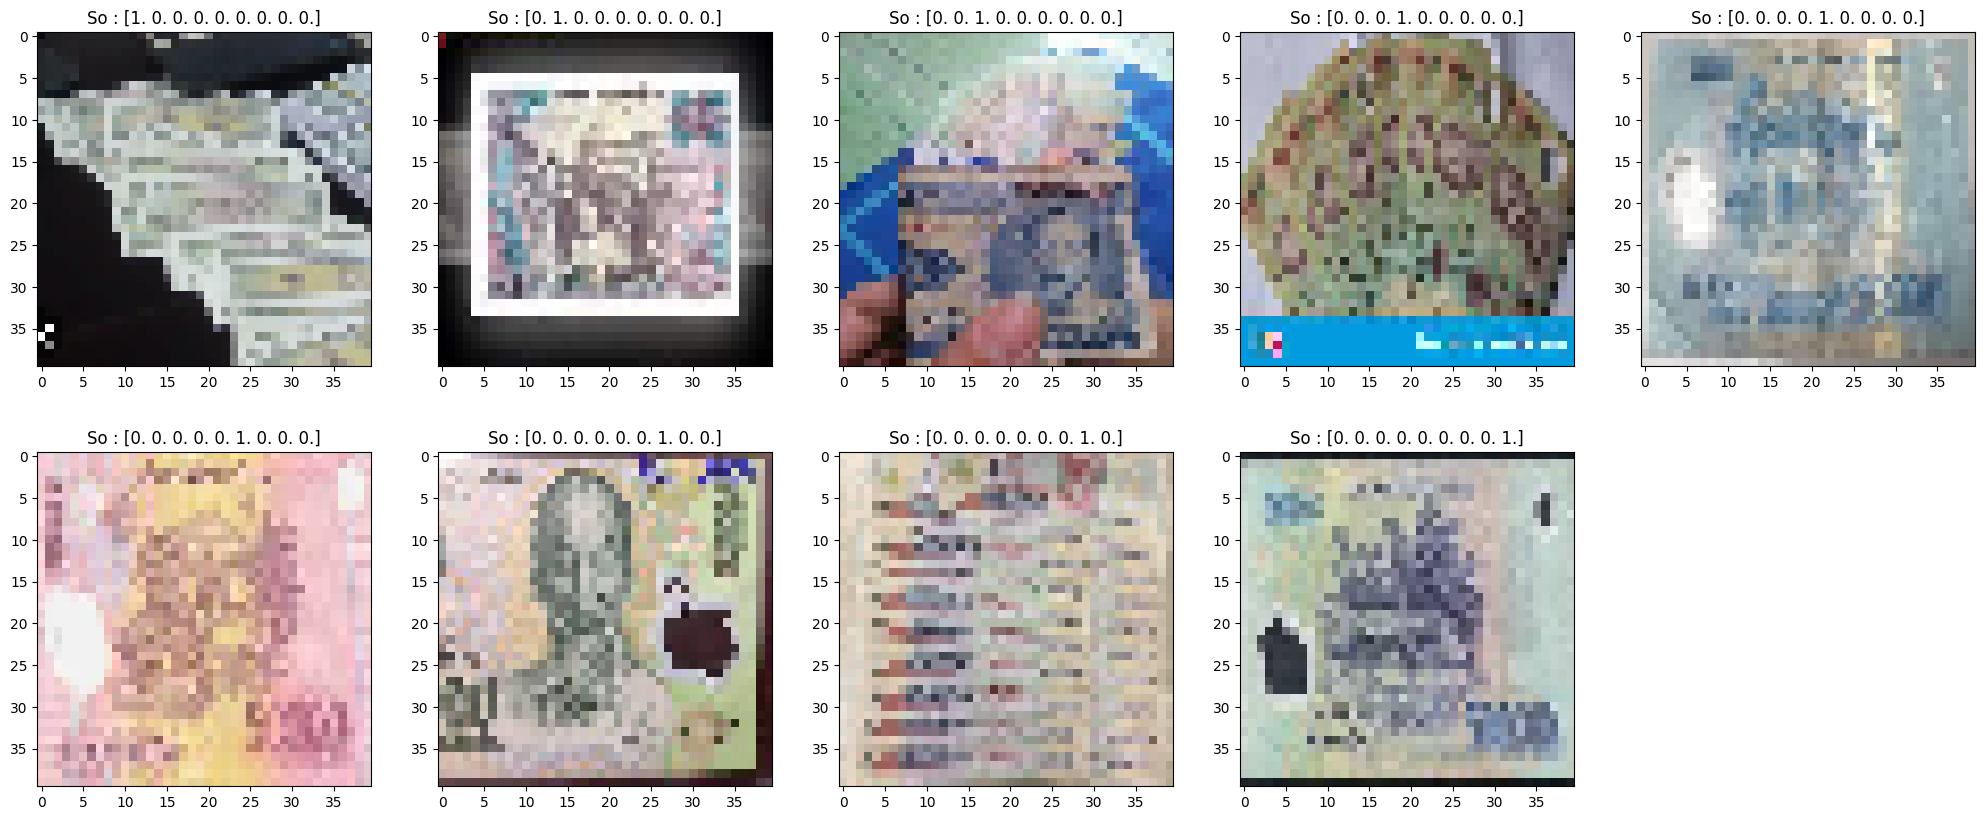

In [68]:
plt.figure(figsize = [25,10])

plt.subplot(251)
plt.imshow(X_train[100])
plt.title('So : {}'.format(y_train[100]))

plt.subplot(252)
plt.imshow(X_train[190])
plt.title('So : {}'.format(y_train[190]))

plt.subplot(253)
plt.imshow(X_train[300])
plt.title('So : {}'.format(y_train[300]))

plt.subplot(254)
plt.imshow(X_train[500])
plt.title('So : {}'.format(y_train[500]))

plt.subplot(255)
plt.imshow(X_train[600])
plt.title('So : {}'.format(y_train[600]))

plt.subplot(256)
plt.imshow(X_train[701])
plt.title('So : {}'.format(y_train[701]))

plt.subplot(257)
plt.imshow(X_train[801])
plt.title('So : {}'.format(y_train[801]))

plt.subplot(258)
plt.imshow(X_train[951])
plt.title('So : {}'.format(y_train[951]))

plt.subplot(259)
plt.imshow(X_train[1110])
plt.title('So : {}'.format(y_train[1110]))

plt.show()

In [69]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [37]:
batch_size = 64
epochs = 20
classes = 9

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (40,40,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                  

In [39]:
train = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
19/19 [==============================] - 4s 166ms/step - loss: 2.2606 - accuracy: 0.1655
Epoch 2/20
19/19 [==============================] - 4s 230ms/step - loss: 1.8946 - accuracy: 0.2995
Epoch 3/20
19/19 [==============================] - 3s 164ms/step - loss: 1.5233 - accuracy: 0.4616
Epoch 4/20
19/19 [==============================] - 3s 163ms/step - loss: 1.2482 - accuracy: 0.5427
Epoch 5/20
19/19 [==============================] - 4s 195ms/step - loss: 1.0771 - accuracy: 0.6331
Epoch 6/20
19/19 [==============================] - 4s 230ms/step - loss: 0.8362 - accuracy: 0.7082
Epoch 7/20
19/19 [==============================] - 3s 167ms/step - loss: 0.7342 - accuracy: 0.7526
Epoch 8/20
19/19 [==============================] - 3s 178ms/step - loss: 0.5995 - accuracy: 0.8166
Epoch 9/20
19/19 [==============================] - 4s 215ms/step - loss: 0.4764 - accuracy: 0.8498
Epoch 10/20
19/19 [==============================] - 3s 170ms/step - loss: 0.4153 - accuracy: 0.8720

In [81]:
folder = '/content/drive/MyDrive/Data_CNN/Test/tien'
tien = ['1nghin', '2nghin', '5nghin', '10nghin','20nghin', '50nghin', '100nghin', '200nghin','500nghin']
X_test, y_test = list(), list()
for i in range (9):
  filename = folder +'/'+ tien[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    X_test.append(photo)
    y_test.append(i)
X_test = asarray(X_test)
y_test = asarray(y_test)

In [82]:
print(X_test.shape)
print(y_test.shape)

(180, 40, 40, 3)
(180,)


In [83]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
X_test = X_test.astype('float32')/255

6/6 [==============================] - 0s 24ms/step - loss: 1.2456 - accuracy: 0.7944
Test loss 1.2455977201461792
Test accuracy 0.7944444417953491


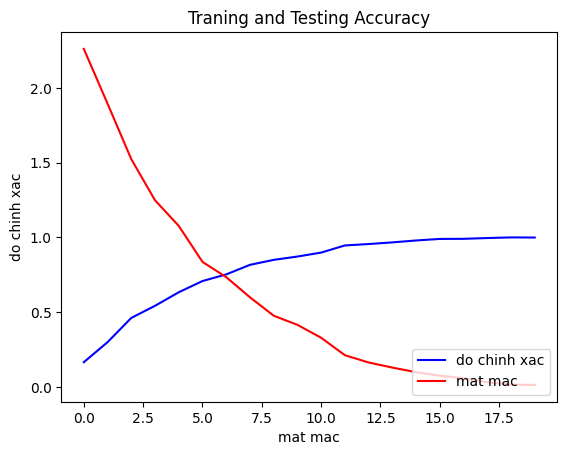

In [84]:
eval = model.evaluate(X_test, y_test)

print('Test loss',eval[0])
print('Test accuracy',eval[1])

accuracy=train.history['accuracy']
loss=train.history['loss']

epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'b')
plt.plot(epochs,loss,'r')
plt.title('Traning and Testing Accuracy')
plt.ylabel('do chinh xac')
plt.xlabel('mat mac')
plt.legend(['do chinh xac','mat mac'], loc = 'lower right')

1/1 [==============================] - 0s 17ms/step


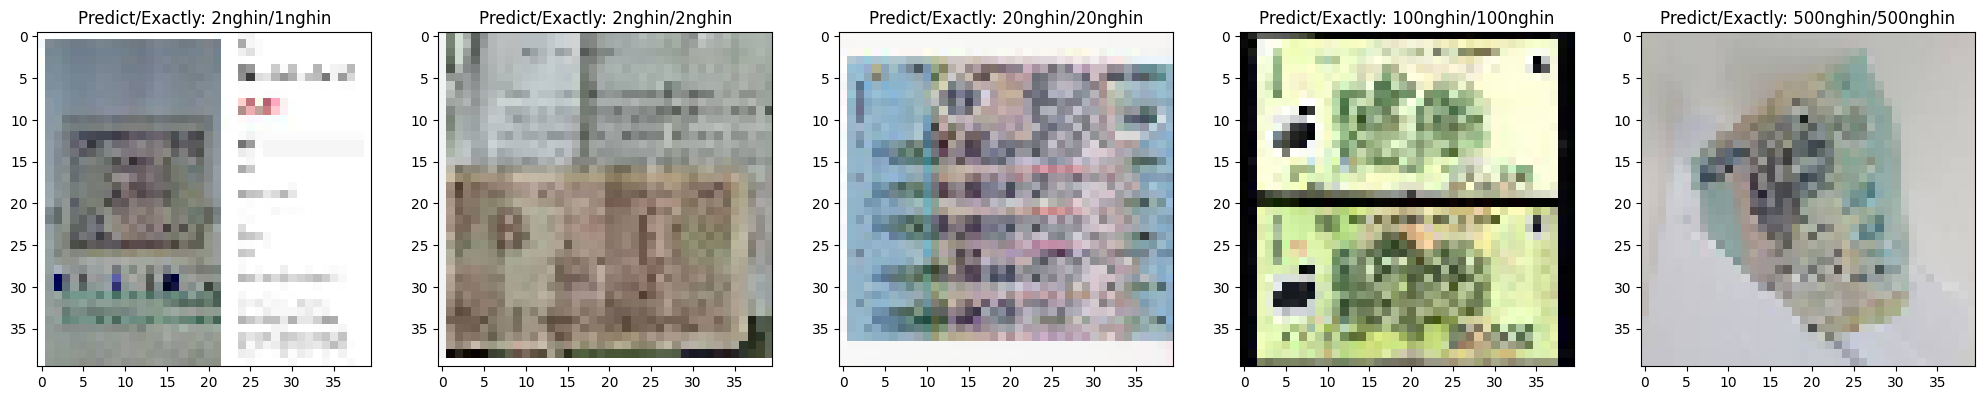

In [91]:
plt.figure(figsize = [25,25])

plt.subplot(151)
plt.imshow(X_test[10])
pred = model.predict(X_test[10].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(tien[pred.argmax()], tien[y_test[10].argmax()] ))

plt.subplot(152)
plt.imshow(X_test[31])
pred = model.predict(X_test[31].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(tien[pred.argmax()], tien[y_test[31].argmax()] ))

plt.subplot(153)
plt.imshow(X_test[90])
pred = model.predict(X_test[90].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(tien[pred.argmax()], tien[y_test[90].argmax()] ))

plt.subplot(154)
plt.imshow(X_test[130])
pred = model.predict(X_test[130].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(tien[pred.argmax()], tien[y_test[130].argmax()] ))

plt.subplot(155)
plt.imshow(X_test[178])
pred = model.predict(X_test[178].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(tien[pred.argmax()], tien[y_test[178].argmax()] ))

plt.show()